In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/DL/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
13,1100,2,40.0
17,1540,3,60.0
4,1200,2,51.0
10,1800,3,82.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
scaled_x = sx.fit_transform(df.drop('price',axis = 'columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df[['price']])
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [10]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w,X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        cost = np.mean(np.square(y_true-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost
            

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

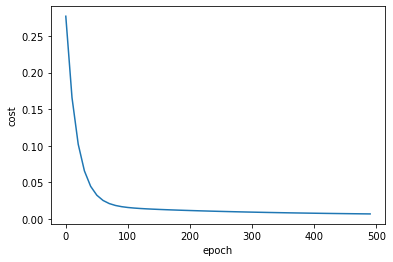

In [11]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [13]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = np.dot(np.transpose(w),scaled_X) + b
    price = sy.inverse_transform([[scaled_price]])
    return price
    
predict(2600,4,w,b)

C:\Users\Akshatha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [14]:
predict(1000,2,w,b)

C:\Users\Akshatha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [17]:
import random
random.randint(0,6)

1

In [34]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_X.T) + b
        
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd
            

(array([0.70832923, 0.67759077]), -0.22968813194817458, 0.001871613659610383)

In [27]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [35]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\Akshatha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.95127222]])

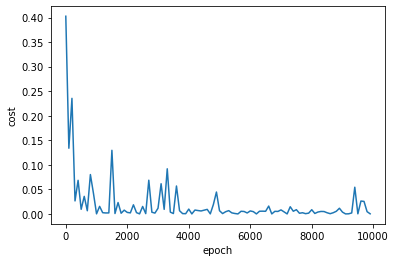

In [36]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

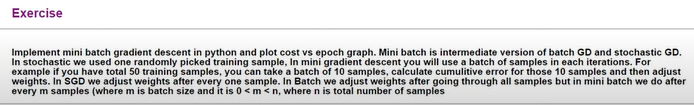

In [51]:
def minibatch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_indices = [random.randint(0,total_samples-1) for j in range(10)]
        sample_X = np.array([X[j] for j in random_indices])
        sample_y = np.array([y_true[j] for j in random_indices])
        y_predicted = np.dot(w,sample_X.T) + b
        
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_mbgd,b_mbgd,cost_mbgd,cost_list_mbgd,epoch_list_mbgd = minibatch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_mbgd,b_mbgd,cost_mbgd
            

(array([0.70781379, 0.6741711 ]), -0.23356319410859366, 0.005072419715652835)

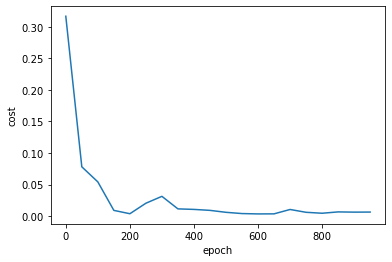

In [53]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [55]:
predict(2600,4,w_mbgd,b_mbgd)

C:\Users\Akshatha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.03870694]])